<a href="https://colab.research.google.com/github/T-OKAY/study_001/blob/main/study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1章

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from dateutil.relativedelta import relativedelta
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
from sklearn.decomposition import PCA


In [ ]:

customer_master = pd.read_csv('/content/drive/MyDrive/Python実践データ分析100本ノック/1章/customer_master.csv')
customer_master.head()


,customer_id,customer_name,registration_date,customer_name_kana,email,gender,age,birth,pref
0,IK152942,平田 裕次郎,2019-01-01 00:25:33,ひらた ゆうじろう,hirata_yuujirou@example.com,M,29,1990/6/10,石川県
1,TS808488,田村 詩織,2019-01-01 01:13:45,たむら しおり,tamura_shiori@example.com,F,33,1986/5/20,東京都
2,AS834628,久野 由樹,2019-01-01 02:00:14,ひさの ゆき,hisano_yuki@example.com,F,63,1956/1/2,茨城県
3,AS345469,鶴岡 薫,2019-01-01 04:48:22,つるおか かおる,tsuruoka_kaoru@example.com,M,74,1945/3/25,東京都
4,GD892565,大内 高史,2019-01-01 04:54:51,おおうち たかし,oouchi_takashi@example.com,M,54,1965/8/5,千葉県


In [ ]:
item_master = pd.read_csv('/content/drive/MyDrive/Python実践データ分析100本ノック/1章/item_master.csv')
item_master.head()

,item_id,item_name,item_price
0,S001,PC-A,50000
1,S002,PC-B,85000
2,S003,PC-C,120000
3,S004,PC-D,180000
4,S005,PC-E,210000


In [ ]:
transaction_1_master = pd.read_csv('/content/drive/MyDrive/Python実践データ分析100本ノック/1章/transaction_1.csv')
transaction_1_master.head()

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
4,T0000000117,170000,2019-02-01 04:33:46,PL542865


In [ ]:
transaction_2_master = pd.read_csv('/content/drive/MyDrive/Python実践データ分析100本ノック/1章/transaction_2.csv')
transaction_2_master.head()

,transaction_id,price,payment_date,customer_id
0,T0000005113,295000,2019-06-15 07:20:27,TS169261
1,T0000005114,50000,2019-06-15 07:35:47,HI599892
2,T0000005115,85000,2019-06-15 07:56:36,HI421757
3,T0000005116,50000,2019-06-15 08:40:55,OA386378
4,T0000005117,120000,2019-06-15 08:44:23,TS506913


In [ ]:
transaction_detail_1_master = pd.read_csv('/content/drive/MyDrive/Python実践データ分析100本ノック/1章/transaction_detail_1.csv')
transaction_detail_1_master.head()

,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1
1,1,T0000000114,S001,1
2,2,T0000000115,S003,1
3,3,T0000000116,S005,1
4,4,T0000000117,S002,2


In [ ]:
transaction_detail_2_master = pd.read_csv('/content/drive/MyDrive/Python実践データ分析100本ノック/1章/transaction_detail_2.csv')
transaction_detail_2_master.head()

,detail_id,transaction_id,item_id,quantity
0,5000,T0000004870,S002,3
1,5001,T0000004871,S003,1
2,5002,T0000004872,S001,2
3,5003,T0000004873,S004,1
4,5004,T0000004874,S003,2


In [ ]:
transaction = pd.concat([transaction_1_master, transaction_2_master], ignore_index=True)
transaction.head()

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
4,T0000000117,170000,2019-02-01 04:33:46,PL542865


In [ ]:
print(len(transaction_1_master))
print(len(transaction_2_master))
print(len(transaction))

5000
1786
6786


In [ ]:
transaction_detail = pd.concat([transaction_detail_1_master, transaction_detail_2_master], ignore_index=True)
transaction_detail.head()

,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1
1,1,T0000000114,S001,1
2,2,T0000000115,S003,1
3,3,T0000000116,S005,1
4,4,T0000000117,S002,2


In [ ]:
print(len(transaction_detail_1_master))
print(len(transaction_detail_2_master))
print(len(transaction_detail))

5000
2144
7144


In [ ]:
join_data = pd.merge(transaction_detail, transaction[["transaction_id", "payment_date", "customer_id"]], on="transaction_id", how="left")
join_data.head()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865


In [ ]:


join_data = pd.merge(join_data, customer_master, on="customer_id", how="left")
join_data = pd.merge(join_data, item_master, on="item_id", how="left")
join_data.head()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id,customer_name,registration_date,customer_name_kana,email,gender,age,birth,pref,item_name,item_price
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502,井本 芳正,2019-01-07 14:34:35,いもと よしまさ,imoto_yoshimasa@example.com,M,30,1989/7/15,熊本県,PC-E,210000
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019,三船 六郎,2019-01-27 18:00:11,みふね ろくろう,mifune_rokurou@example.com,M,73,1945/11/29,京都府,PC-A,50000
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120,山根 小雁,2019-01-11 08:16:02,やまね こがん,yamane_kogan@example.com,M,42,1977/5/17,茨城県,PC-C,120000
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215,池田 菜摘,2019-01-10 05:07:38,いけだ なつみ,ikeda_natsumi@example.com,F,47,1972/3/17,兵庫県,PC-E,210000
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865,栗田 憲一,2019-01-25 06:46:05,くりた けんいち,kurita_kenichi@example.com,M,74,1944/12/17,長崎県,PC-B,85000


In [ ]:
join_data["price"] = join_data["quantity"] * join_data["item_price"] 
join_data[["quantity", "item_price" ,"price"]].head()

,quantity,item_price,price
0,1,210000,210000
1,1,50000,50000
2,1,120000,120000
3,1,210000,210000
4,2,85000,170000


In [ ]:
print(join_data["price"].sum())
print(transaction["price"].sum())

971135000
971135000


In [ ]:
join_data.isnull().sum()

detail_id             0
transaction_id        0
item_id               0
quantity              0
payment_date          0
customer_id           0
customer_name         0
registration_date     0
customer_name_kana    0
email                 0
gender                0
age                   0
birth                 0
pref                  0
item_name             0
item_price            0
price                 0
dtype: int64

In [ ]:
join_data.describe()

,detail_id,quantity,age,item_price,price
count,7144.000000,7144.000000,7144.000000,7144.000000,7144.000000
mean,3571.500000,1.199888,50.265677,121698.628219,135937.150056
std,2062.439494,0.513647,17.190314,64571.311830,68511.453297
min,0.000000,1.000000,20.000000,50000.000000,50000.000000
25%,1785.750000,1.000000,36.000000,50000.000000,85000.000000
50%,3571.500000,1.000000,50.000000,102500.000000,120000.000000
75%,5357.250000,1.000000,65.000000,187500.000000,210000.000000
max,7143.000000,4.000000,80.000000,210000.000000,420000.000000


In [ ]:
print(join_data["payment_date"].min())
print(join_data["payment_date"].max())

2019-02-01 01:36:57
2019-07-31 23:41:38


In [ ]:
join_data.dtypes

detail_id              int64
transaction_id        object
item_id               object
quantity               int64
payment_date          object
customer_id           object
customer_name         object
registration_date     object
customer_name_kana    object
email                 object
gender                object
age                    int64
birth                 object
pref                  object
item_name             object
item_price             int64
price                  int64
dtype: object

In [ ]:
join_data["payment_date"] = pd.to_datetime(join_data["payment_date"])
join_data["payment_month"] = join_data["payment_date"].dt.strftime("%y%m")
join_data[["payment_date", "payment_month"]].head()

,payment_date,payment_month
0,2019-02-01 01:36:57,1902
1,2019-02-01 01:37:23,1902
2,2019-02-01 02:34:19,1902
3,2019-02-01 02:47:23,1902
4,2019-02-01 04:33:46,1902


In [ ]:
join_data.groupby("payment_month").sum()["price"]

payment_month
1902    160185000
1903    160370000
1904    160510000
1905    155420000
1906    164030000
1907    170620000
Name: price, dtype: int64

In [ ]:
join_data.groupby(["payment_month", "item_name"]).sum()[["price", "quantity"]]

price  quantity
payment_month item_name                    
1902          PC-A       24150000       483
              PC-B       25245000       297
              PC-C       19800000       165
              PC-D       31140000       173
              PC-E       59850000       285
1903          PC-A       26000000       520
              PC-B       25500000       300
              PC-C       19080000       159
              PC-D       25740000       143
              PC-E       64050000       305
1904          PC-A       25900000       518
              PC-B       23460000       276
              PC-C       21960000       183
              PC-D       24300000       135
              PC-E       64890000       309
1905          PC-A       24850000       497
              PC-B       25330000       298
              PC-C       20520000       171
              PC-D       25920000       144
              PC-E       58800000       280
1906          PC-A       26000000       520
              PC-B       23970000       282
              PC-C       21840000       182
              PC-D       28800000       160
              PC-E       63420000       302
1907          PC-A       25250000       505
              PC-B       28220000       332
              PC-C       19440000       162
              PC-D       26100000       145
              PC-E       71610000       341

In [ ]:
graph_data_0 = pd.pivot_table(join_data, index="item_name", columns="payment_month", values=["price", "quantity"], aggfunc="sum")

graph_data = pd.pivot_table(join_data, index="payment_month", columns="item_name", values="price", aggfunc="sum")
graph_data.head()

item_name,PC-A,PC-B,PC-C,PC-D,PC-E
payment_month,,,,,
1902,24150000,25245000,19800000,31140000,59850000
1903,26000000,25500000,19080000,25740000,64050000
1904,25900000,23460000,21960000,24300000,64890000
1905,24850000,25330000,20520000,25920000,58800000
1906,26000000,23970000,21840000,28800000,63420000


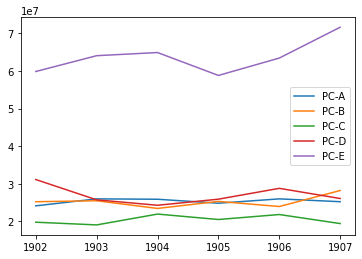

In [ ]:
plt.plot(list(graph_data.index), graph_data["PC-A"], label='PC-A')
plt.plot(list(graph_data.index), graph_data["PC-B"], label='PC-B')
plt.plot(list(graph_data.index), graph_data["PC-C"], label="PC-C")
plt.plot(list(graph_data.index), graph_data["PC-D"], label="PC-D")
plt.plot(list(graph_data.index), graph_data["PC-E"], label="PC-E")
plt.legend()

2章

In [ ]:
uriage_data = pd.read_csv("/content/drive/MyDrive/Python実践データ分析100本ノック/2章/uriage.csv")
uriage_data.head()

,purchase_date,item_name,item_price,customer_name
0,2019-06-13 18:02:34,商品A,100.0,深井菜々美
1,2019-07-13 13:05:29,商 品 S,NaN,浅田賢二
2,2019-05-11 19:42:07,商 品 a,NaN,南部慶二
3,2019-02-12 23:40:45,商品Z,2600.0,麻生莉緒
4,2019-04-22 03:09:35,商品a,NaN,平田鉄二


In [ ]:
kokyaku_data = pd.read_excel("/content/drive/MyDrive/Python実践データ分析100本ノック/2章/kokyaku_daicho.xlsx")
kokyaku_data.head()

,顧客名,かな,地域,メールアドレス,登録日
0,須賀ひとみ,すが ひとみ,H市,suga_hitomi@example.com,2018/01/04
1,岡田 敏也,おかだ としや,E市,okada_toshiya@example.com,42782
2,芳賀 希,はが のぞみ,A市,haga_nozomi@example.com,2018/01/07
3,荻野 愛,おぎの あい,F市,ogino_ai@example.com,42872
4,栗田 憲一,くりた けんいち,E市,kurita_kenichi@example.com,43127


In [ ]:
uriage_data["item_name"].head()

0      商品A
1    商 品 S
2    商 品 a
3      商品Z
4      商品a
Name: item_name, dtype: object

In [ ]:
uriage_data["item_price"].head()

0     100.0
1       NaN
2       NaN
3    2600.0
4       NaN
Name: item_price, dtype: float64

In [ ]:
uriage_data["purchase_date"] = pd.to_datetime(uriage_data["purchase_date"])
uriage_data["purchase_month"] = uriage_data["purchase_date"].dt.strftime("%y%m")
res = uriage_data.pivot_table(index="purchase_month", columns="item_name", aggfunc="size", fill_value=0)
res

item_name,商品W,商 品 n,商品E,商品M,商品P,商品S,商品W,商品X,商 品O,商 品Q,...,商品k,商品l,商品o,商品p,商品r,商品s,商品t,商品v,商品x,商品y
purchase_month,,,,,,,,,,,,,,,,,,,,,
1901,0,1,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
1902,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,1,1,0,0
1903,0,0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1904,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1905,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1906,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1907,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,2,0,0,0,0,0


In [ ]:
res = uriage_data.pivot_table(index="purchase_month", columns="item_name", values="item_price", aggfunc="sum", fill_value=0)
res

item_name,商品W,商 品 n,商品E,商品M,商品P,商品S,商品W,商品X,商 品O,商 品Q,...,商品k,商品l,商品o,商品p,商品r,商品s,商品t,商品v,商品x,商品y
purchase_month,,,,,,,,,,,,,,,,,,,,,
1901,0,1400,0,0,0,0,0,0,0,0,...,1100,1200,1500,0,0,0,0,0,0,0
1902,0,0,0,0,0,0,0,2400,0,0,...,0,0,0,0,0,1900,2000,2200,0,0
1903,0,0,500,1300,1600,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1904,2300,0,0,0,0,0,0,0,0,1700,...,0,0,0,0,0,1900,0,0,0,0
1905,0,0,0,0,0,1900,0,0,0,0,...,0,1200,0,0,0,0,0,0,0,2500
1906,0,0,0,0,0,0,2300,0,0,0,...,0,0,0,1600,0,0,0,0,2400,0
1907,0,0,0,0,0,0,0,0,0,0,...,0,0,1500,0,1800,0,0,0,0,0


In [ ]:
print(len(pd.unique(uriage_data.item_name)))

26


In [ ]:
#item_nameのデータの揺れを解消
uriage_data["item_name"] = uriage_data["item_name"].str.upper()           #アルファベットを大文字に統一
uriage_data["item_name"] = uriage_data["item_name"].str.replace(" ","")   #半角スペースを除去
uriage_data["item_name"] = uriage_data["item_name"].str.replace("　","")  #全角スペースを除去
uriage_data.sort_values(by=["item_name"], ascending=True)                 #商品名でソート


,purchase_date,item_name,item_price,customer_name,purchase_month
0,2019-06-13 18:02:34,商品A,100.0,深井菜々美,1906
1748,2019-05-19 20:22:22,商品A,100.0,松川綾女,1905
223,2019-06-25 08:13:20,商品A,100.0,板橋隆,1906
1742,2019-06-13 16:03:17,商品A,100.0,小平陽子,1906
1738,2019-02-10 00:28:43,商品A,100.0,松田浩正,1902
...,...,...,...,...,...
2880,2019-04-22 00:36:52,商品Y,NaN,田辺光洋,1904
2881,2019-04-30 14:21:09,商品Y,NaN,高原充則,1904
1525,2019-01-24 10:27:23,商品Y,2500.0,五十嵐春樹,1901
1361,2019-05-28 13:45:32,商品Y,2500.0,大崎ヒカル,1905


In [ ]:
print(pd.unique(uriage_data["item_name"]))
print(len(pd.unique(uriage_data["item_name"])))

['商品A' '商品S' '商品Z' '商品V' '商品O' '商品U' '商品L' '商品C' '商品I' '商品R' '商品X' '商品G'
 '商品P' '商品Q' '商品Y' '商品N' '商品W' '商品E' '商品K' '商品B' '商品F' '商品D' '商品M' '商品H'
 '商品T' '商品J']
26


In [ ]:
#欠損値の確認
uriage_data.isnull().any(axis=0)

purchase_date     False
item_name         False
item_price         True
customer_name     False
purchase_month    False
dtype: bool

In [ ]:
#欠損値の補完
flg_is_null = uriage_data["item_price"].isnull()                                                    #item_priceの欠損値の確認
for trg in list(uriage_data.loc[flg_is_null, "item_name"].unique()):                                #item_priceの欠損値をリスト化して、そのリスト分のforループを回す
  price = uriage_data.loc[(~flg_is_null) & (uriage_data["item_name"] == trg), "item_price"].max()   #同じ商品名の正確な金額を探索して格納（`~flg_is_null`は欠損値ではない）
  uriage_data["item_price"].loc[(flg_is_null) & (uriage_data["item_name"] == trg)] = price          #欠損値を取得した値で補完
uriage_data.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,purchase_date,item_name,item_price,customer_name,purchase_month
0,2019-06-13 18:02:34,商品A,100.0,深井菜々美,1906
1,2019-07-13 13:05:29,商品S,1900.0,浅田賢二,1907
2,2019-05-11 19:42:07,商品A,100.0,南部慶二,1905
3,2019-02-12 23:40:45,商品Z,2600.0,麻生莉緒,1902
4,2019-04-22 03:09:35,商品A,100.0,平田鉄二,1904


In [ ]:
#欠損値の確認
uriage_data.isnull().any(axis=0)

purchase_date     False
item_name         False
item_price        False
customer_name     False
purchase_month    False
dtype: bool

In [ ]:
#各商品の金額が正確に補完されているか確認
for trg in list(uriage_data.loc[flg_is_null, "item_name"].sort_values().unique()):                                #item_priceの欠損値をリスト化→ソートして、そのリスト分のforループを回す
  print(trg + "の最大値：" + str(uriage_data.loc[uriage_data["item_name"] == trg]["item_price"].max()) + "の最小値：" + str(uriage_data.loc[uriage_data["item_name"] == trg]["item_price"].min(skipna=False)))

商品Aの最大値：100.0の最小値：100.0
商品Bの最大値：200.0の最小値：200.0
商品Cの最大値：300.0の最小値：300.0
商品Dの最大値：400.0の最小値：400.0
商品Eの最大値：500.0の最小値：500.0
商品Fの最大値：600.0の最小値：600.0
商品Gの最大値：700.0の最小値：700.0
商品Hの最大値：800.0の最小値：800.0
商品Iの最大値：900.0の最小値：900.0
商品Jの最大値：1000.0の最小値：1000.0
商品Kの最大値：1100.0の最小値：1100.0
商品Lの最大値：1200.0の最小値：1200.0
商品Mの最大値：1300.0の最小値：1300.0
商品Nの最大値：1400.0の最小値：1400.0
商品Oの最大値：1500.0の最小値：1500.0
商品Pの最大値：1600.0の最小値：1600.0
商品Qの最大値：1700.0の最小値：1700.0
商品Rの最大値：1800.0の最小値：1800.0
商品Sの最大値：1900.0の最小値：1900.0
商品Tの最大値：2000.0の最小値：2000.0
商品Uの最大値：2100.0の最小値：2100.0
商品Vの最大値：2200.0の最小値：2200.0
商品Wの最大値：2300.0の最小値：2300.0
商品Xの最大値：2400.0の最小値：2400.0
商品Yの最大値：2500.0の最小値：2500.0


In [ ]:
#顧客台帳の顧客名データ確認
kokyaku_data["顧客名"].head()

0     須賀ひとみ
1    岡田　 敏也
2      芳賀 希
3     荻野  愛
4     栗田 憲一
Name: 顧客名, dtype: object

In [ ]:
#売り上げ履歴の顧客名データ確認
uriage_data["customer_name"].head()

0    深井菜々美
1     浅田賢二
2     南部慶二
3     麻生莉緒
4     平田鉄二
Name: customer_name, dtype: object

In [ ]:
#顧客名のデータの揺れを解消
kokyaku_data["顧客名"] = kokyaku_data["顧客名"].str.replace(" ","")   #半角スペースを除去
kokyaku_data["顧客名"] = kokyaku_data["顧客名"].str.replace("　","")  #全角スペースを除去
kokyaku_data.head()

,顧客名,かな,地域,メールアドレス,登録日
0,須賀ひとみ,すが ひとみ,H市,suga_hitomi@example.com,2018/01/04
1,岡田敏也,おかだ としや,E市,okada_toshiya@example.com,42782
2,芳賀希,はが のぞみ,A市,haga_nozomi@example.com,2018/01/07
3,荻野愛,おぎの あい,F市,ogino_ai@example.com,42872
4,栗田憲一,くりた けんいち,E市,kurita_kenichi@example.com,43127


In [ ]:
#日付データが数値になっている箇所の特定
flg_is_serial = kokyaku_data["登録日"].astype("str").str.isdigit() #登録日列のデータのうち数値に該当する箇所を抽出
flg_is_serial.sum()

22

In [ ]:
#登録日列内の数値を日付に変換
fromSelial = pd.to_timedelta(kokyaku_data.loc[flg_is_serial, "登録日"].astype("float"), unit="D") +  pd.to_datetime("1900/01/01") #登録日列のデータのうち数値に該当する箇所を特定し、日付データに変換
fromSelial

1     2017-02-18
3     2017-05-19
4     2018-01-29
21    2017-07-06
27    2017-06-17
47    2017-01-08
49    2017-07-15
53    2017-04-10
76    2018-03-31
80    2018-01-12
99    2017-06-01
114   2018-06-05
118   2018-01-31
122   2018-04-18
139   2017-05-27
143   2017-03-26
155   2017-01-21
172   2018-03-24
179   2017-01-10
183   2017-07-26
186   2018-07-15
192   2018-06-10
Name: 登録日, dtype: datetime64[ns]

In [ ]:
#書式統一
fromString =  pd.to_datetime(kokyaku_data.loc[~flg_is_serial, "登録日"])
fromString

0     2018-01-04
2     2018-01-07
5     2017-06-20
6     2018-06-11
7     2017-05-19
         ...    
195   2017-06-20
196   2018-06-20
197   2017-04-29
198   2019-04-19
199   2019-04-23
Name: 登録日, Length: 178, dtype: datetime64[ns]

In [ ]:
#変換したデータの統合
kokyaku_data["登録日"] = pd.concat([fromSelial, fromString])
kokyaku_data

,顧客名,かな,地域,メールアドレス,登録日
0,須賀ひとみ,すが ひとみ,H市,suga_hitomi@example.com,2018-01-04
1,岡田敏也,おかだ としや,E市,okada_toshiya@example.com,2017-02-18
2,芳賀希,はが のぞみ,A市,haga_nozomi@example.com,2018-01-07
3,荻野愛,おぎの あい,F市,ogino_ai@example.com,2017-05-19
4,栗田憲一,くりた けんいち,E市,kurita_kenichi@example.com,2018-01-29
...,...,...,...,...,...
195,川上りえ,かわかみ りえ,G市,kawakami_rie@example.com,2017-06-20
196,小松季衣,こまつ としえ,E市,komatsu_toshie@example.com,2018-06-20
197,白鳥りえ,しらとり りえ,F市,shiratori_rie@example.com,2017-04-29
198,大西隆之介,おおにし りゅうのすけ,H市,oonishi_ryuunosuke@example.com,2019-04-19


In [ ]:
#登録月の集計
kokyaku_data["登録年月"] = kokyaku_data["登録日"].dt.strftime("%y%m") #登録日から登録年月に変換し格納
rslt = kokyaku_data.groupby("登録年月").count()["顧客名"]             #登録年月ごとの顧客名をカウント
print(rslt)
print(len(kokyaku_data))

登録年月
1701    15
1702    11
1703    14
1704    15
1705    13
1706    14
1707    17
1801    13
1802    15
1803    17
1804     5
1805    19
1806    13
1807    17
1904     2
Name: 顧客名, dtype: int64
200


In [ ]:
#数値項目の有無の確認
flg_is_serial = kokyaku_data["登録日"].astype("str").str.isdigit() #登録日列のデータのうち数値に該当する箇所を抽出
flg_is_serial.sum()

0

In [ ]:
#売り上げ履歴のデータと顧客台帳のデータを結合
dump_data = pd.merge(uriage_data, kokyaku_data, left_on="customer_name", right_on="顧客名", how="left") #売り上げ履歴をcustomer_nameと顧客台帳の顧客名に符合するデータで結合する
dump_data = dump_data.drop("customer_name", axis=1)                                                     #
dump_data

,purchase_date,item_name,item_price,purchase_month,顧客名,かな,地域,メールアドレス,登録日,登録年月
0,2019-06-13 18:02:34,商品A,100.0,1906,深井菜々美,ふかい ななみ,C市,fukai_nanami@example.com,2017-01-26,1701
1,2019-07-13 13:05:29,商品S,1900.0,1907,浅田賢二,あさだ けんじ,C市,asada_kenji@example.com,2018-04-07,1804
2,2019-05-11 19:42:07,商品A,100.0,1905,南部慶二,なんぶ けいじ,A市,nannbu_keiji@example.com,2018-06-19,1806
3,2019-02-12 23:40:45,商品Z,2600.0,1902,麻生莉緒,あそう りお,D市,asou_rio@example.com,2018-07-22,1807
4,2019-04-22 03:09:35,商品A,100.0,1904,平田鉄二,ひらた てつじ,D市,hirata_tetsuji@example.com,2017-06-07,1706
...,...,...,...,...,...,...,...,...,...,...
2994,2019-02-15 02:56:39,商品Y,2500.0,1902,福島友也,ふくしま ともや,B市,fukushima_tomoya@example.com,2017-07-01,1707
2995,2019-06-22 04:03:43,商品M,1300.0,1906,大倉晃司,おおくら こうじ,E市,ookura_kouji@example.com,2018-03-31,1803
2996,2019-03-29 11:14:05,商品Q,1700.0,1903,尾形小雁,おがた こがん,B市,ogata_kogan@example.com,2017-03-15,1703
2997,2019-07-14 12:56:49,商品H,800.0,1907,芦田博之,あしだ ひろゆき,E市,ashida_hiroyuki@example.com,2018-07-15,1807


In [ ]:
#csvに出力
dump_data.to_csv("/content/drive/MyDrive/Python実践データ分析100本ノック/2章/dump_data_std.csv", index="False")

In [ ]:
#csvファイルの読み込み
import_data = pd.read_csv("/content/drive/MyDrive/Python実践データ分析100本ノック/2章/dump_data_std.csv")
import_data

,Unnamed: 0,purchase_date,item_name,item_price,purchase_month,顧客名,かな,地域,メールアドレス,登録日,登録年月
0,0,2019-06-13 18:02:34,商品A,100.0,1906,深井菜々美,ふかい ななみ,C市,fukai_nanami@example.com,2017-01-26 00:00:00,1701
1,1,2019-07-13 13:05:29,商品S,1900.0,1907,浅田賢二,あさだ けんじ,C市,asada_kenji@example.com,2018-04-07 00:00:00,1804
2,2,2019-05-11 19:42:07,商品A,100.0,1905,南部慶二,なんぶ けいじ,A市,nannbu_keiji@example.com,2018-06-19 00:00:00,1806
3,3,2019-02-12 23:40:45,商品Z,2600.0,1902,麻生莉緒,あそう りお,D市,asou_rio@example.com,2018-07-22 00:00:00,1807
4,4,2019-04-22 03:09:35,商品A,100.0,1904,平田鉄二,ひらた てつじ,D市,hirata_tetsuji@example.com,2017-06-07 00:00:00,1706
...,...,...,...,...,...,...,...,...,...,...,...
2994,2994,2019-02-15 02:56:39,商品Y,2500.0,1902,福島友也,ふくしま ともや,B市,fukushima_tomoya@example.com,2017-07-01 00:00:00,1707
2995,2995,2019-06-22 04:03:43,商品M,1300.0,1906,大倉晃司,おおくら こうじ,E市,ookura_kouji@example.com,2018-03-31 00:00:00,1803
2996,2996,2019-03-29 11:14:05,商品Q,1700.0,1903,尾形小雁,おがた こがん,B市,ogata_kogan@example.com,2017-03-15 00:00:00,1703
2997,2997,2019-07-14 12:56:49,商品H,800.0,1907,芦田博之,あしだ ひろゆき,E市,ashida_hiroyuki@example.com,2018-07-15 00:00:00,1807


In [ ]:
#purchase_monthを軸にして商品ごとに集計
byItem = import_data.pivot_table(index="purchase_month", columns="item_name", aggfunc="size", fill_value=0)
byItem

item_name,商品A,商品B,商品C,商品D,商品E,商品F,商品G,商品H,商品I,商品J,...,商品Q,商品R,商品S,商品T,商品U,商品V,商品W,商品X,商品Y,商品Z
purchase_month,,,,,,,,,,,,,,,,,,,,,
1901,18,13,19,17,18,15,11,16,18,17,...,17,21,20,17,7,22,13,14,10,0
1902,19,14,26,21,16,14,14,17,12,14,...,22,22,22,23,19,22,24,16,11,1
1903,17,21,20,17,9,27,14,18,12,16,...,23,16,20,12,23,18,16,21,16,0
1904,17,19,24,20,18,17,14,11,18,13,...,20,20,16,16,11,15,14,16,20,0
1905,24,14,16,14,19,18,23,15,16,11,...,13,22,18,16,16,9,21,16,20,0
1906,24,12,11,19,13,18,15,13,19,22,...,15,16,21,12,18,20,17,15,13,0
1907,20,20,17,17,12,17,19,19,19,23,...,15,19,23,21,13,28,16,18,12,0


In [ ]:
#purchase_month、商品を軸にして売上金額を集計
byPrice = import_data.pivot_table(index="purchase_month", columns="item_name", values="item_price", aggfunc="sum", fill_value=0)
byPrice

item_name,商品A,商品B,商品C,商品D,商品E,商品F,商品G,商品H,商品I,商品J,...,商品Q,商品R,商品S,商品T,商品U,商品V,商品W,商品X,商品Y,商品Z
purchase_month,,,,,,,,,,,,,,,,,,,,,
1901,1800,2600,5700,6800,9000,9000,7700,12800,16200,17000,...,28900,37800,38000,34000,14700,48400,29900,33600,25000,0
1902,1900,2800,7800,8400,8000,8400,9800,13600,10800,14000,...,37400,39600,41800,46000,39900,48400,55200,38400,27500,2600
1903,1700,4200,6000,6800,4500,16200,9800,14400,10800,16000,...,39100,28800,38000,24000,48300,39600,36800,50400,40000,0
1904,1700,3800,7200,8000,9000,10200,9800,8800,16200,13000,...,34000,36000,30400,32000,23100,33000,32200,38400,50000,0
1905,2400,2800,4800,5600,9500,10800,16100,12000,14400,11000,...,22100,39600,34200,32000,33600,19800,48300,38400,50000,0
1906,2400,2400,3300,7600,6500,10800,10500,10400,17100,22000,...,25500,28800,39900,24000,37800,44000,39100,36000,32500,0
1907,2000,4000,5100,6800,6000,10200,13300,15200,17100,23000,...,25500,34200,43700,42000,27300,61600,36800,43200,30000,0


In [ ]:
#purchase_monthを軸にして顧客名ごとに集計
byCutomer = import_data.pivot_table(index="purchase_month", columns="顧客名", aggfunc="size", fill_value=0)
byCutomer

顧客名,さだ千佳子,中仁晶,中田美智子,丸山光臣,久保田倫子,亀井一徳,五十嵐春樹,井上桃子,井口寛治,井川真悠子,...,香椎優一,高原充則,高梨結衣,高沢美咲,高田さんま,鳥居広司,鶴岡薫,麻生莉緒,黄川田博之,黒谷長利
purchase_month,,,,,,,,,,,,,,,,,,,,,
1901,3,1,4,2,2,0,5,3,3,1,...,0,1,1,1,5,2,0,2,2,5
1902,9,1,2,2,1,4,2,1,0,4,...,4,0,3,2,0,1,2,4,0,1
1903,1,2,1,6,1,4,3,3,2,2,...,3,1,6,2,4,2,4,2,2,1
1904,0,3,1,2,0,2,2,0,3,2,...,2,4,2,3,4,3,2,1,2,0
1905,3,2,5,2,4,1,2,1,3,3,...,1,1,1,0,2,2,3,4,4,1
1906,1,3,0,4,1,1,1,2,2,3,...,7,3,0,2,1,0,2,1,2,4
1907,3,0,3,2,5,3,5,2,5,5,...,2,4,4,2,0,2,4,3,4,1


In [ ]:
#purchase_monthを軸にして地域ごとに集計
byRegion = import_data.pivot_table(index="purchase_month", columns="地域", aggfunc="size", fill_value=0)
byRegion

地域,A市,B市,C市,D市,E市,F市,G市,H市
purchase_month,,,,,,,,
1901,59,55,72,34,49,57,49,42
1902,71,46,65,48,61,52,43,63
1903,64,52,57,43,52,59,51,59
1904,64,48,54,45,48,58,40,52
1905,57,52,68,48,59,65,35,43
1906,53,47,61,30,51,51,58,58
1907,76,53,61,42,54,64,47,54


In [ ]:
#集計期間内で購入していないユーザーがいるか確認
away_data = pd.merge(uriage_data, kokyaku_data, left_on="customer_name", right_on="顧客名", how="right")
away_data[away_data["purchase_date"].isnull()][["顧客名", "メールアドレス", "登録日"]]

,顧客名,メールアドレス,登録日
2999,福井美希,fukui_miki1@example.com,2019-04-23


3章

In [ ]:
#利用履歴の読み込み
uselog = pd.read_csv("/content/drive/MyDrive/Python実践データ分析100本ノック/3章/use_log.csv")
print(len(uselog))
uselog.head()

197428


,log_id,customer_id,usedate
0,L00000049012330,AS009373,2018-04-01
1,L00000049012331,AS015315,2018-04-01
2,L00000049012332,AS040841,2018-04-01
3,L00000049012333,AS046594,2018-04-01
4,L00000049012334,AS073285,2018-04-01


In [ ]:
#顧客情報の読み込み
customer = pd.read_csv("/content/drive/MyDrive/Python実践データ分析100本ノック/3章/customer_master.csv")
print(len(customer))
customer.head()

4192


,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0


In [ ]:
#会員区分情報の読み込み
class_master = pd.read_csv("/content/drive/MyDrive/Python実践データ分析100本ノック/3章/class_master.csv")
print(len(class_master))
class_master.head()

3


,class,class_name,price
0,C01,オールタイム,10500
1,C02,デイタイム,7500
2,C03,ナイト,6000


In [ ]:
#キャンペーン区分情報の読み込み
campaign_master = pd.read_csv("/content/drive/MyDrive/Python実践データ分析100本ノック/3章/campaign_master.csv")
print(len(campaign_master))
campaign_master.head()

3


,campaign_id,campaign_name
0,CA1,通常
1,CA2,入会費半額
2,CA3,入会費無料


In [ ]:
#顧客情報に会員区分とキャンペーン区分情報を結合
customer_join = pd.merge(customer, class_master, on="class", how="left")
customer_join = pd.merge(customer_join, campaign_master, on="campaign_id", how="left")
customer_join.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500,通常
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500,通常
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500,通常
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500,通常
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0,ナイト,6000,通常


In [ ]:
#欠損値の確認
customer_join.isnull().sum()

customer_id         0
name                0
class               0
gender              0
start_date          0
end_date         2842
campaign_id         0
is_deleted          0
class_name          0
price               0
campaign_name       0
dtype: int64

In [ ]:
#会員区分の人数把握
customer_join.groupby("class_name").count()["customer_id"]

class_name
オールタイム    2045
デイタイム     1019
ナイト       1128
Name: customer_id, dtype: int64

In [ ]:
#キャンペーン区分の人数把握
customer_join.groupby("campaign_name").count()["customer_id"]

campaign_name
入会費半額     650
入会費無料     492
通常       3050
Name: customer_id, dtype: int64

In [ ]:
#性別の内訳を把握
customer_join.groupby("gender").count()["customer_id"]

gender
F    1983
M    2209
Name: customer_id, dtype: int64

In [ ]:
#退会の有無を把握
customer_join.groupby("is_deleted").count()["customer_id"]

is_deleted
0    2842
1    1350
Name: customer_id, dtype: int64

In [ ]:
#入会日の型変換
customer_join["start_date"] = pd.to_datetime(customer_join["start_date"])
#2018年4月1日以降に入会した人数の把握
customer_start = customer_join.loc[customer_join["start_date"] > pd.to_datetime("20180401")]
print(len(customer_start))

1361


In [ ]:
#退会日の型変換
customer_join["end_date"] = pd.to_datetime(customer_join["end_date"])
#最新月のユーザーを絞り込む
customer_newer = customer_join.loc[(customer_join["end_date"] >= pd.to_datetime("20190331")) | (customer_join["end_date"].isna())]
print(len(customer_newer))
customer_newer["end_date"].unique()

2953


array([                          'NaT', '2019-03-31T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [ ]:
#会員区分の人数把握
customer_newer.groupby("class_name").count()["customer_id"]

class_name
オールタイム    1444
デイタイム      696
ナイト        813
Name: customer_id, dtype: int64

In [ ]:
#キャンペーン区分の人数把握
customer_newer.groupby("campaign_name").count()["customer_id"]

campaign_name
入会費半額     311
入会費無料     242
通常       2400
Name: customer_id, dtype: int64

In [ ]:
#性別の内訳を把握
customer_newer.groupby("gender").count()["customer_id"]

gender
F    1400
M    1553
Name: customer_id, dtype: int64

In [ ]:
#月/顧客毎の利用回数の集計
uselog["usedate"] = pd.to_datetime(uselog["usedate"])                           #日付型の変換
uselog["年月"] = uselog["usedate"].dt.strftime("%y%m")                          #年月データに変換後格納
uselog_months = uselog.groupby(["年月", "customer_id"], as_index=False).count() #年月、顧客IDで集計
uselog_months.rename(columns={"log_id":"count"}, inplace=True)                  #タグ名の変更
del uselog_months["usedate"]                                                    #usedate列の削除
uselog_months.head()

,年月,customer_id,count
0,1804,AS002855,4
1,1804,AS009013,2
2,1804,AS009373,3
3,1804,AS015315,6
4,1804,AS015739,7


In [ ]:
#顧客毎の月内利用回数の集計
uselog_customer = uselog_months.groupby("customer_id").agg(["mean", "median", "max", "min"])["count"] #月/顧客毎の利用回数の集計結果から顧客ID毎の利用回数の平均、中央値、最大、最小を集計
uselog_customer = uselog_customer.reset_index(drop=False)                                             #indexの振り直し
uselog_customer.head()

,customer_id,mean,median,max,min
0,AS002855,4.500000,5.0,7,2
1,AS008805,4.000000,4.0,8,1
2,AS009013,2.000000,2.0,2,2
3,AS009373,5.083333,5.0,7,3
4,AS015233,7.545455,7.0,11,4


In [ ]:
#顧客毎の月/曜日別データの集計
uselog["weekday"] = uselog["usedate"].dt.weekday                                                                                          #利用日を曜日に変換しweekdayタグを新設して格納
uselog_weekday = uselog.groupby(["customer_id", "年月", "weekday"], as_index=False).count()[["customer_id", "年月", "weekday", "log_id"]] #顧客ID、年月、曜日で集計
uselog_weekday.rename(columns={"log_id":"count"}, inplace=True)                                                                           #タグ名の変更
uselog_weekday.head()

,customer_id,年月,weekday,count
0,AS002855,1804,5,4
1,AS002855,1805,2,1
2,AS002855,1805,5,4
3,AS002855,1806,5,5
4,AS002855,1807,1,1


In [ ]:
#フラグの作成
uselog_weekday = uselog_weekday.groupby("customer_id", as_index=False).max()[["customer_id", "count"]]  #顧客毎のカウントの最大値を取得
uselog_weekday["routime_flg"] = 0                                                                       #routime_flgタグを新設して0を代入
uselog_weekday["routime_flg"] = uselog_weekday["routime_flg"].where(uselog_weekday["count"]<4, 1)       #count値が4未満のとき,そのまま、4未満でないとき1を代入
uselog_weekday.head()

,customer_id,count,routime_flg
0,AS002855,5,1
1,AS008805,4,1
2,AS009013,2,0
3,AS009373,5,1
4,AS015233,5,1


In [ ]:
#顧客データと利用履歴データの結合
customer_join = pd.merge(customer_join, uselog_customer, on="customer_id", how="left")                                #顧客データと利用履歴データを顧客IDで結合
customer_join = pd.merge(customer_join, uselog_weekday[["customer_id", "routime_flg"]], on="customer_id", how="left") #結合したデータと顧客ID毎のroutimeを結合
customer_join.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routime_flg
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.833333,5.0,8,2,1
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,5.083333,5.0,7,3,1
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.583333,5.0,6,3,1
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.833333,4.5,7,2,1
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,ナイト,6000,通常,3.916667,4.0,6,1,1


In [ ]:
#欠損値の確認
customer_join.isnull().sum()

customer_id         0
name                0
class               0
gender              0
start_date          0
end_date         2842
campaign_id         0
is_deleted          0
class_name          0
price               0
campaign_name       0
mean                0
median              0
max                 0
min                 0
routime_flg         0
dtype: int64

In [ ]:
#会員期間の計算
customer_join["calc_date"] = customer_join["end_date"]
customer_join["calc_date"] = customer_join["end_date"].fillna(pd.to_datetime("20190430"))         #欠損値に20190430を代入
customer_join["menbership_period"] = 0
for i in range(len(customer_join)):
  delta = relativedelta(customer_join["calc_date"].iloc[i], customer_join["start_date"].iloc[i])  #加入日と退会日の期間を計算
  customer_join["menbership_period"].iloc[i] = delta.years*12 + delta.months                      #算出した期間を月単位に変換してmenbership_periodタグに代入

customer_join.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routime_flg,calc_date,menbership_period
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.833333,5.0,8,2,1,2019-04-30,47
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,5.083333,5.0,7,3,1,2019-04-30,47
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.583333,5.0,6,3,1,2019-04-30,47
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.833333,4.5,7,2,1,2019-04-30,47
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,ナイト,6000,通常,3.916667,4.0,6,1,1,2019-04-30,47


In [ ]:
#平均、中央値、最大、最小値を集計して表示
customer_join[["mean", "median", "max", "min"]].describe()

,mean,median,max,min
count,4192.000000,4192.000000,4192.000000,4192.000000
mean,5.333127,5.250596,7.823950,3.041269
std,1.777533,1.874874,2.168959,1.951565
min,1.000000,1.000000,1.000000,1.000000
25%,4.250000,4.000000,7.000000,2.000000
50%,5.000000,5.000000,8.000000,3.000000
75%,6.416667,6.500000,9.000000,4.000000
max,12.000000,12.000000,14.000000,12.000000


In [ ]:
#routtime_flgの集計
customer_join.groupby("routime_flg").count()["customer_id"]

routime_flg
0     779
1    3413
Name: customer_id, dtype: int64

(array([857., 774., 395., 368., 311., 331., 323., 237., 288., 308.]),
 array([ 1. ,  5.6, 10.2, 14.8, 19.4, 24. , 28.6, 33.2, 37.8, 42.4, 47. ]),
 <a list of 10 Patch objects>)

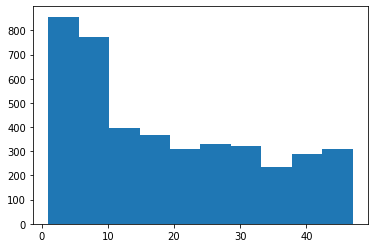

In [ ]:
#会員期間の分布を棒グラフで可視化
plt.hist(customer_join["menbership_period"])

In [ ]:
#退会ユーザーの集計
customer_end = customer_join.loc[customer_join["is_deleted"]==1]
customer_end.describe()

,is_deleted,price,mean,median,max,min,routime_flg,menbership_period
count,1350.0,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000
mean,1.0,8595.555556,3.865474,3.621852,6.461481,1.821481,0.456296,8.026667
std,0.0,1949.163652,1.246385,1.270847,2.584021,0.976361,0.498271,5.033692
min,1.0,6000.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,1.0,6000.000000,3.000000,3.000000,4.000000,1.000000,0.000000,4.000000
50%,1.0,7500.000000,4.000000,4.000000,7.000000,2.000000,0.000000,7.000000
75%,1.0,10500.000000,4.666667,4.500000,8.000000,2.000000,1.000000,11.000000
max,1.0,10500.000000,9.000000,9.000000,13.000000,8.000000,1.000000,23.000000


In [ ]:
#継続ユーザーの集計
customer_stay = customer_join.loc[customer_join["is_deleted"]==0]
customer_stay.describe()

,is_deleted,price,mean,median,max,min,routime_flg,menbership_period
count,2842.0,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000
mean,0.0,8542.927516,6.030288,6.024279,8.471147,3.620690,0.984166,23.970443
std,0.0,1977.189779,1.553587,1.599765,1.571048,2.030488,0.124855,13.746761
min,0.0,6000.000000,3.166667,3.000000,5.000000,1.000000,0.000000,1.000000
25%,0.0,6000.000000,4.833333,5.000000,7.000000,2.000000,1.000000,12.000000
50%,0.0,7500.000000,5.583333,5.500000,8.000000,3.000000,1.000000,24.000000
75%,0.0,10500.000000,7.178030,7.000000,10.000000,5.000000,1.000000,35.000000
max,0.0,10500.000000,12.000000,12.000000,14.000000,12.000000,1.000000,47.000000


In [ ]:
#集計したデータをcsvファイルに出力
customer_join.to_csv("/content/drive/MyDrive/Python実践データ分析100本ノック/3章/customer_join.csv")

4章

In [2]:
#利用データ読み込みと欠損値確認
uselog = pd.read_csv("/content/drive/MyDrive/Python実践データ分析100本ノック/4章/use_log.csv")
uselog.isnull().sum()

log_id         0
customer_id    0
usedate        0
dtype: int64

In [3]:
#顧客データの読み込みと欠損値確認
customer = pd.read_csv("/content/drive/MyDrive/Python実践データ分析100本ノック/4章/customer_join.csv")
customer.isnull().sum()


customer_id             0
name                    0
class                   0
gender                  0
start_date              0
end_date             2842
campaign_id             0
is_deleted              0
class_name              0
price                   0
campaign_name           0
mean                    0
median                  0
max                     0
min                     0
routine_flg             0
calc_date               0
membership_period       0
dtype: int64

In [4]:
#顧客データをグループ化
customer_clustering = customer[["mean", "median", "max", "min", "membership_period"]]
customer_clustering.head()

,mean,median,max,min,membership_period
0,4.833333,5.0,8,2,47
1,5.083333,5.0,7,3,47
2,4.583333,5.0,6,3,47
3,4.833333,4.5,7,2,47
4,3.916667,4.0,6,1,47


In [5]:
# 顧客データを4つにクラスタリング
customer_clustering_sc = sc.fit_transform(customer_clustering)  #標準化

kmeans = KMeans(n_clusters=4, random_state=0)                   #K-meansの設定
clusters = kmeans.fit(customer_clustering_sc)                   #K-meansモデルに標準化したデータを入力
customer_clustering["cluster"] = clusters.labels_               #クラスタのラベルを新設したcluster列に格納

print(customer_clustering["cluster"].unique)
customer_clustering.head()

<bound method Series.unique of 0       1
1       1
2       1
3       1
4       1
       ..
4187    0
4188    0
4189    0
4190    0
4191    0
Name: cluster, Length: 4192, dtype: int32>


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,mean,median,max,min,membership_period,cluster
0,4.833333,5.0,8,2,47,1
1,5.083333,5.0,7,3,47,1
2,4.583333,5.0,6,3,47,1
3,4.833333,4.5,7,2,47,1
4,3.916667,4.0,6,1,47,1


In [6]:
#グループ毎のデータ件数
customer_clustering.columns = ["月内平均値", "月内中央値", "月内最大値","月内最小値", "会員期間", "cluster"]
customer_clustering.groupby("cluster").count()

,月内平均値,月内中央値,月内最大値,月内最小値,会員期間
cluster,,,,,
0,840,840,840,840,840
1,1249,1249,1249,1249,1249
2,771,771,771,771,771
3,1332,1332,1332,1332,1332


In [7]:
#グループ毎の平均
customer_clustering.groupby("cluster").mean()

,月内平均値,月内中央値,月内最大値,月内最小値,会員期間
cluster,,,,,
0,8.061942,8.047024,10.014286,6.175000,7.019048
1,4.677561,4.670937,7.233787,2.153723,36.915933
2,3.065504,2.900130,4.783398,1.649805,9.276265
3,5.539535,5.391141,8.756006,2.702703,14.867868


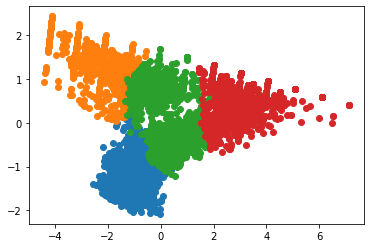

In [10]:
#次元削減による可視化
X = customer_clustering_sc
pca = PCA(n_components=2) #2次元に削減
pca.fit(X)
#主成分分析
x_pca = pca.transform(X)  
pca_df = pd.DataFrame(x_pca)
pca_df["cluster"] = customer_clustering["cluster"]
#散布図に描画
for i in customer_clustering["cluster"].unique():
  tmp = pca_df.loc[pca_df["cluster"]==i]
  plt.scatter(tmp[0], tmp[1])

In [11]:
#グループ毎の退会/継続顧客の集計
customer_clustering = pd.concat([customer_clustering, customer], axis=1) #customer_clusteringとcustomerを結合
customer_clustering.groupby(["cluster", "is_deleted"], as_index=False).count()[["cluster", "is_deleted", "customer_id"]]

,cluster,is_deleted,customer_id
0,0,0,821
1,0,1,19
2,1,0,1231
3,1,1,18
4,2,1,771
5,3,0,790
6,3,1,542


In [12]:
#グループ/定期利用Flg毎の集計
customer_clustering.groupby(["cluster", "routine_flg"], as_index=False).count()[["cluster", "routine_flg", "customer_id"]]

,cluster,routine_flg,customer_id
0,0,0,52
1,0,1,788
2,1,0,2
3,1,1,1247
4,2,0,499
5,2,1,272
6,3,0,226
7,3,1,1106


In [14]:
#データ成型
uselog["usedate"] = pd.to_datetime(uselog["usedate"])
uselog["年月"] = uselog["usedate"].dt.strftime("%y%m")
uselog_months = uselog.groupby(["年月", "customer_id"], as_index=False).count()
uselog_months.rename(columns={"log_id":"count"}, inplace=True)
del uselog_months["usedate"]
uselog_months.head()

,年月,customer_id,count,usedata
0,1804,AS002855,4,4
1,1804,AS009013,2,2
2,1804,AS009373,3,3
3,1804,AS015315,6,6
4,1804,AS015739,7,7


In [47]:
#データ成型2
year_months = list(uselog_months["年月"].unique())
Predict_data = pd.DataFrame()
#6ヶ月目～最終月までデータを格納
for i in range(6, len(year_months)):
  tmp = uselog_months.loc[uselog_months["年月"]==year_months[i]]
  tmp.rename(columns={"count":"count_pred"}, inplace=True)
  #過去6か月分の利用データの取得
  for j in range(1, 7):
    tmp_before =uselog_months.loc[uselog_months["年月"]==year_months[i-j]]
    del tmp_before["年月"]
    tmp_before.rename(columns={"count":"count_{}".format(j-1)}, inplace=True)
    tmp = pd.merge(tmp, tmp_before, on="customer_id", how="left")

  Predict_data = pd.concat([Predict_data, tmp], ignore_index=True)

Predict_data.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: Passing 'suffixes' which cause duplicate columns {'usedata_x'} in the result is deprecated and will raise a MergeError in a future version.
  del sys.path[0]


,年月,customer_id,count_pred,usedata_x,count_0,usedata_y,count_1,usedata_x,count_2,usedata_y,count_3,usedata_x,count_4,usedata_y,count_5,usedata
0,1810,AS002855,3,3,7.0,7.0,3.0,3.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0
1,1810,AS008805,2,2,2.0,2.0,5.0,5.0,7.0,7.0,8.0,8.0,NaN,NaN,NaN,NaN
2,1810,AS009373,5,5,6.0,6.0,6.0,6.0,7.0,7.0,4.0,4.0,4.0,4.0,3.0,3.0
3,1810,AS015233,7,7,9.0,9.0,11.0,11.0,5.0,5.0,7.0,7.0,7.0,7.0,NaN,NaN
4,1810,AS015315,4,4,7.0,7.0,3.0,3.0,6.0,6.0,3.0,3.0,3.0,3.0,6.0,6.0


In [48]:
#欠損値除去とindexの初期化
Predict_data = Predict_data.dropna()
Predict_data = Predict_data.reset_index(drop=True)
Predict_data.head()

,年月,customer_id,count_pred,usedata_x,count_0,usedata_y,count_1,usedata_x,count_2,usedata_y,count_3,usedata_x,count_4,usedata_y,count_5,usedata
0,1810,AS002855,3,3,7.0,7.0,3.0,3.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0
1,1810,AS009373,5,5,6.0,6.0,6.0,6.0,7.0,7.0,4.0,4.0,4.0,4.0,3.0,3.0
2,1810,AS015315,4,4,7.0,7.0,3.0,3.0,6.0,6.0,3.0,3.0,3.0,3.0,6.0,6.0
3,1810,AS015739,5,5,6.0,6.0,5.0,5.0,8.0,8.0,6.0,6.0,5.0,5.0,7.0,7.0
4,1810,AS019860,7,7,5.0,5.0,7.0,7.0,4.0,4.0,6.0,6.0,8.0,8.0,6.0,6.0


In [49]:
#顧客データのstart_date列の結合
Predict_data = pd.merge(Predict_data, customer[["customer_id", "start_date"]], on="customer_id", how="left")
Predict_data.head()

,年月,customer_id,count_pred,usedata_x,count_0,usedata_y,count_1,usedata_x,count_2,usedata_y,count_3,usedata_x,count_4,usedata_y,count_5,usedata,start_date
0,1810,AS002855,3,3,7.0,7.0,3.0,3.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,2016-11-01
1,1810,AS009373,5,5,6.0,6.0,6.0,6.0,7.0,7.0,4.0,4.0,4.0,4.0,3.0,3.0,2015-11-01
2,1810,AS015315,4,4,7.0,7.0,3.0,3.0,6.0,6.0,3.0,3.0,3.0,3.0,6.0,6.0,2015-07-01
3,1810,AS015739,5,5,6.0,6.0,5.0,5.0,8.0,8.0,6.0,6.0,5.0,5.0,7.0,7.0,2017-06-01
4,1810,AS019860,7,7,5.0,5.0,7.0,7.0,4.0,4.0,6.0,6.0,8.0,8.0,6.0,6.0,2017-10-01


In [62]:
#会員期間の追加
Predict_data["now_date"] = pd.to_datetime(Predict_data["年月"], format="%y%m")
Predict_data["start_date"] = pd.to_datetime(Predict_data["start_date"])

from dateutil.relativedelta import relativedelta

Predict_data["period"] = 1

for i in range(len(Predict_data)):
  delta = relativedelta(Predict_data["now_date"][i], Predict_data["start_date"][i])
  tmp = delta.years*12 + delta.months
  Predict_data["period"][i] = tmp
  print(i)
  print(tmp)
  print(Predict_data["period"][i])

Predict_data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


ストリーミング出力は最後の 5000 行に切り捨てられました。
25
1
13447
14
1
13448
18
1
13449
30
1
13450
10
1
13451
19
1
13452
40
1
13453
21
1
13454
10
1
13455
25
1
13456
25
1
13457
19
1
13458
14
1
13459
23
1
13460
29
1
13461
41
1
13462
28
1
13463
39
1
13464
15
1
13465
19
1
13466
19
1
13467
30
1
13468
6
1
13469
43
1
13470
42
1
13471
39
1
13472
34
1
13473
27
1
13474
42
1
13475
6
1
13476
7
1
13477
6
1
13478
28
1
13479
18
1
13480
13
1
13481
22
1
13482
40
1
13483
6
1
13484
32
1
13485
15
1
13486
14
1
13487
25
1
13488
42
1
13489
22
1
13490
35
1
13491
20
1
13492
5
1
13493
33
1
13494
23
1
13495
22
1
13496
28
1
13497
5
1
13498
32
1
13499
7
1
13500
39
1
13501
7
1
13502
42
1
13503
33
1
13504
28
1
13505
35
1
13506
27
1
13507
17
1
13508
6
1
13509
41
1
13510
14
1
13511
42
1
13512
9
1
13513
37
1
13514
19
1
13515
39
1
13516
15
1
13517
6
1
13518
13
1
13519
5
1
13520
15
1
13521
32
1
13522
6
1
13523
33
1
13524
38
1
13525
26
1
13526
7
1
13527
9
1
13528
30
1
13529
7
1
13530
24
1
13531
43
1
13532
6
1
13533
21
1
13534
39
1
13535
16
1
13

,年月,customer_id,count_pred,usedata_x,count_0,usedata_y,count_1,usedata_x,count_2,usedata_y,count_3,usedata_x,count_4,usedata_y,count_5,usedata,start_date,now_date,period
0,1810,AS002855,3,3,7.0,7.0,3.0,3.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,2016-11-01,2018-10-01,1
1,1810,AS009373,5,5,6.0,6.0,6.0,6.0,7.0,7.0,4.0,4.0,4.0,4.0,3.0,3.0,2015-11-01,2018-10-01,1
2,1810,AS015315,4,4,7.0,7.0,3.0,3.0,6.0,6.0,3.0,3.0,3.0,3.0,6.0,6.0,2015-07-01,2018-10-01,1
3,1810,AS015739,5,5,6.0,6.0,5.0,5.0,8.0,8.0,6.0,6.0,5.0,5.0,7.0,7.0,2017-06-01,2018-10-01,1
4,1810,AS019860,7,7,5.0,5.0,7.0,7.0,4.0,4.0,6.0,6.0,8.0,8.0,6.0,6.0,2017-10-01,2018-10-01,1


In [55]:
print(delta)

relativedelta(years=+1, months=+11)
